<a href="https://colab.research.google.com/github/AneeshYaramati/pothole-detection/blob/main/yolov5_pothole_pytorch-task-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Download repo**

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 10912, done.
remote: Total 10912 (delta 0), reused 0 (delta 0), pack-reused 10912
Receiving objects: 100% (10912/10912), 11.01 MiB | 26.78 MiB/s, done.
Resolving deltas: 100% (7541/7541), done.
/content/yolov5
     |████████████████████████████████| 596 kB 7.9 MB/s 


## env testing

In [3]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# Training the model
We can train the model with train.py command. Few options for training commands are:

**img - define the size of input image**\
**batch - define the batch size**\
**epochs - define the number of training epochs**\
**data - path to yaml file**\
**cfg - specify the model configuration**

**weights - specify the path for the weights for transfer learning.> Weights can be downloaded from [here](https://drive.google.com/drive/folders/1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).
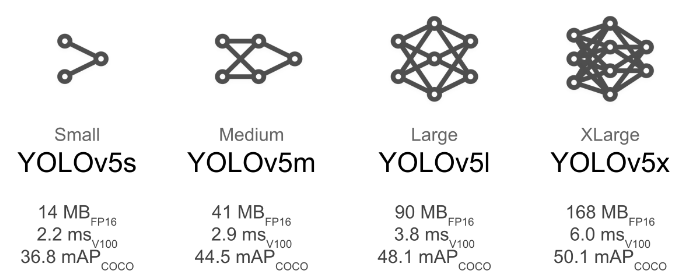

Comparison of the models can be seen [here](https://https://github.com/ultralytics/yolov5#pretrained-checkpoints).

In [4]:
!cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

CSP-NET

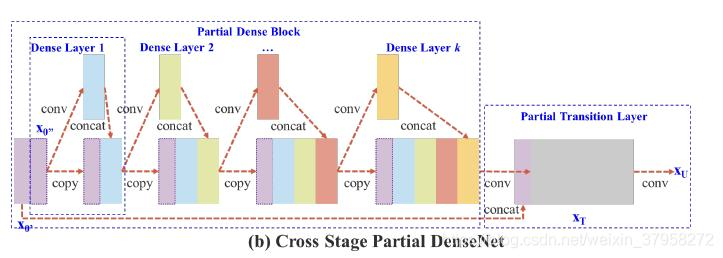

## **CSPNet: A New Backbone that can Enhance Learning Capability of CNN**
an upgrade ,a specility of yolov4 and yolov5

#**EXP 8T01 . Image size 640**

In [ ]:
%cd /content/drive/MyDrive/pothole/
!mkdir yolov5-dataset
%cd yolov5-dataset/
#!unzip /content/potholes.v3i.yolov5pytorch.zip

/content/drive/MyDrive/pothole
mkdir: cannot create directory ‘yolov5-dataset’: File exists
/content/drive/MyDrive/pothole/yolov5-dataset


In [ ]:
%cd /content/drive/MyDrive/pothole/yolov5-dataset

/content/drive/MyDrive/pothole/yolov5-dataset


In [ ]:
!unzip '/content/drive/MyDrive/pothole/yolov5-dataset/pothole-detection.v1i.yolov5pytorch.zip' -d '/content/drive/MyDrive/pothole/yolov5-dataset/'

Archive:  /content/drive/MyDrive/pothole/yolov5-dataset/pothole-detection.v1i.yolov5pytorch.zip
 extracting: /content/drive/MyDrive/pothole/yolov5-dataset/README.dataset.txt  
 extracting: /content/drive/MyDrive/pothole/yolov5-dataset/README.roboflow.txt  
 extracting: /content/drive/MyDrive/pothole/yolov5-dataset/data.yaml  
   creating: /content/drive/MyDrive/pothole/yolov5-dataset/test/
   creating: /content/drive/MyDrive/pothole/yolov5-dataset/test/images/
 extracting: /content/drive/MyDrive/pothole/yolov5-dataset/test/images/img-100_jpg.rf.1d019451d115050e35c257b3c8b8f539.jpg  
 extracting: /content/drive/MyDrive/pothole/yolov5-dataset/test/images/img-110_jpg.rf.03c3fba2117d917dc3f13a749d914fdb.jpg  
 extracting: /content/drive/MyDrive/pothole/yolov5-dataset/test/images/img-114_jpg.rf.17735d42e7393d6859ea239031e93647.jpg  
 extracting: /content/drive/MyDrive/pothole/yolov5-dataset/test/images/img-116_jpg.rf.66f5b7bf99f2cc8e8431d78ea6e31633.jpg  
 extracting: /content/drive/MyDrive

In [5]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bNeUPv2NN7R4M0TYTwv0")
project = rf.workspace("aneeshyaramati-gmail-com").project("pothole-detection-kntq7")
dataset = project.version(1).download("yolov5")

  Using cached roboflow-0.2.2-py3-none-any.whl (24 kB)
     |████████████████████████████████| 1.1 MB 4.2 MB/s 
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached python_dotenv-0.19.2-py2.py3-none-any.whl (17 kB)
  Using cached urllib3-1.26.6-py2.py3-none-any.whl (138 kB)
  Using cached wget-3.2.zip (10 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=7eea989cad4c9715226ac63be9867681a34621c4123675541bfc41d0401127f1
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing ins

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to pothole-detection-1 in yolov5pytorch:: 100%|██████████| 3198/3198 [00:03<00:00, 990.87it/s] 


In [ ]:
while True:pass

In [ ]:
!python train.py --img 640 --batch 16 --epochs 200 --data '/content/drive/MyDrive/pothole/yolov5-dataset/data.yaml' --cfg '/content/drive/MyDrive/pothole/yolov5-dataset/yolov5s.yaml' --weights '' --cache

train: weights=, cfg=/content/drive/MyDrive/pothole/yolov5-dataset/yolov5s.yaml, data=/content/drive/MyDrive/pothole/yolov5-dataset/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-270-g0365379 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

In [ ]:
plot_results(save_dir='runs/train/exp4')  # plot all results*.txt as results.png
Image(filename='runs/train/exp4/results.png', width=800)

NameError: ignored

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --conf 0.2 --source /content/dataset/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/dataset/test/images', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp4/weights/best.pt'])
YOLOv5 🚀 v4.0-169-g1e8ab3f torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/46 /content/dataset/test/images/frame_1080_jpg.rf.f5aed15a3a77f2cdef396ebee3062116.jpg: 640x640 3 potholes, Done. (0.012s)
image 2/46 /content/dataset/test/images/frame_1089_jpg.rf.5367d567e13383ec06f37ac75b7a2cb1.jpg: 640x640 4 potholes, Done. (0.011s)
image 3/46 /content/dataset/test/images/frame_1119_jpg.rf.6ad042ff83c8c2bdc1bcf426215ce850.jpg: 640x640 2 potholes, Done. (0.011s)
image 4/46 /content/dataset/test/images/frame_114_jpg.rf.7d07df35be0e71492a6bd25b1837a0bc.jpg: 64

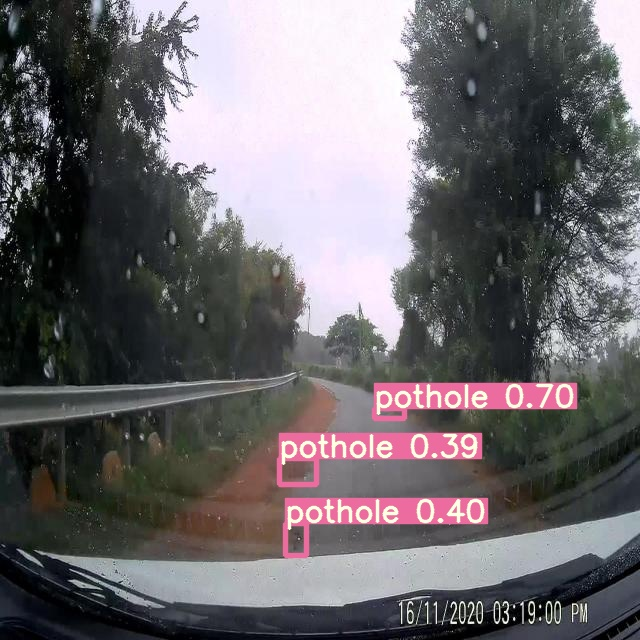

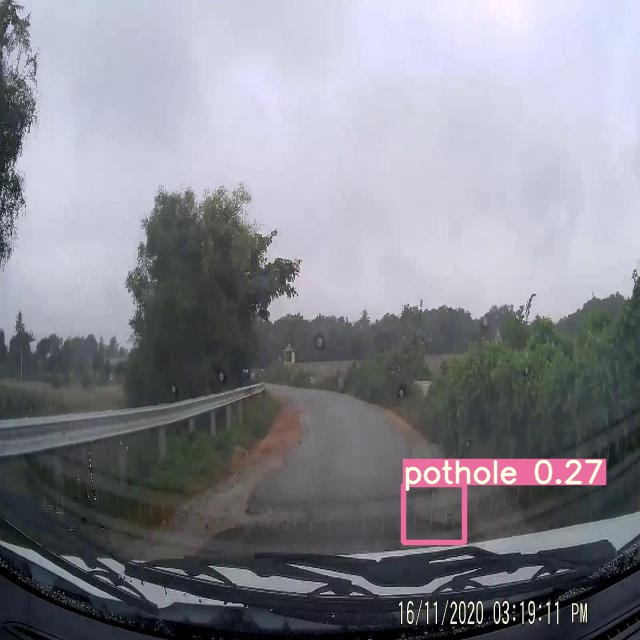

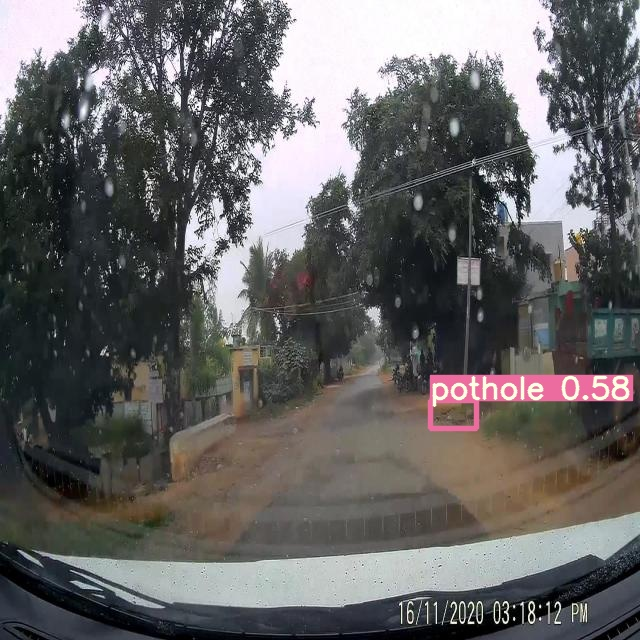

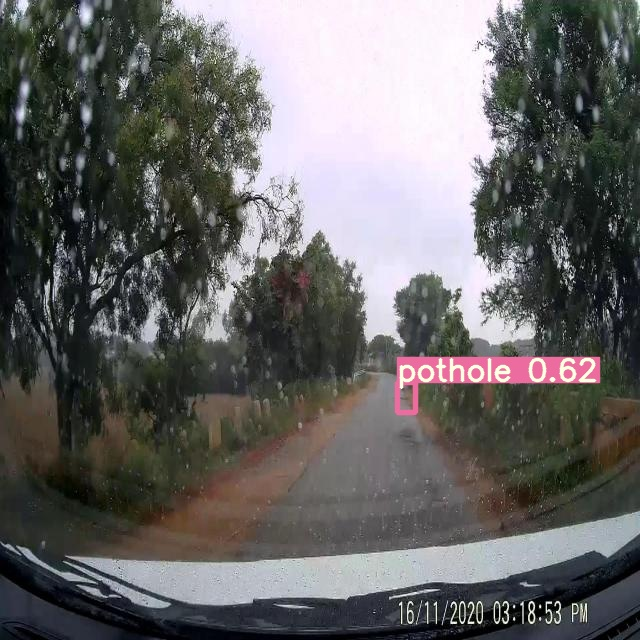

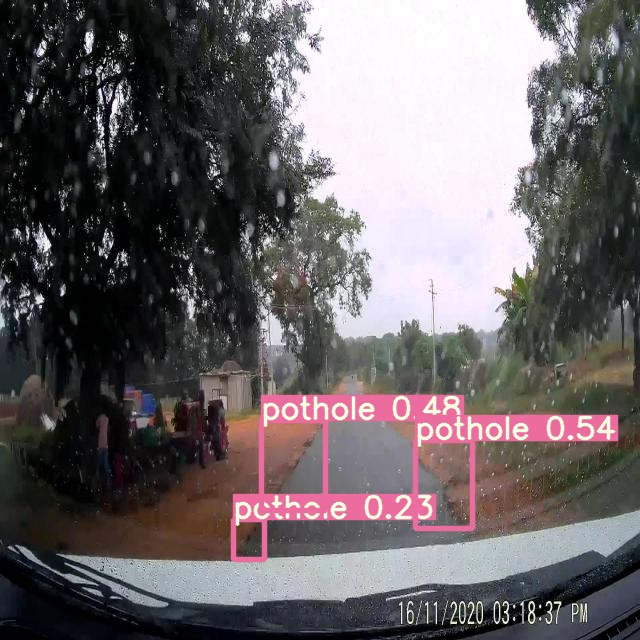

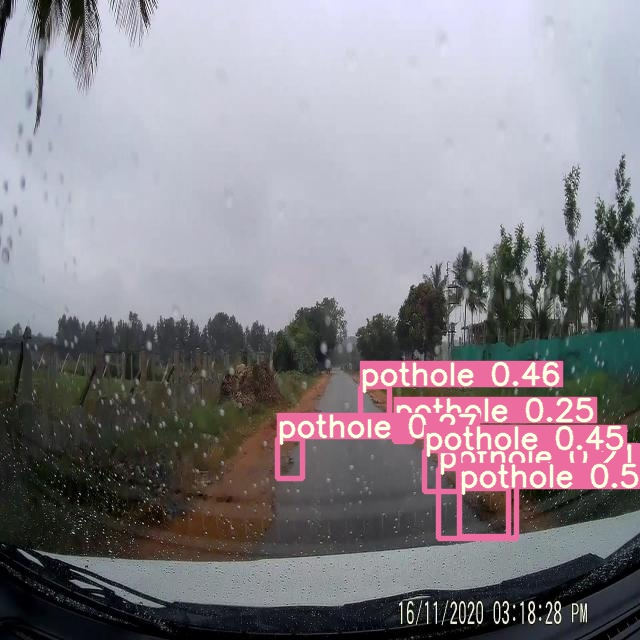

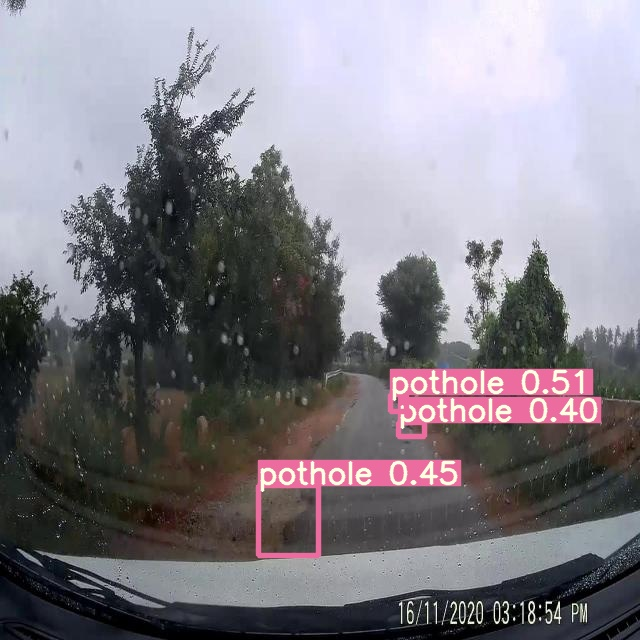

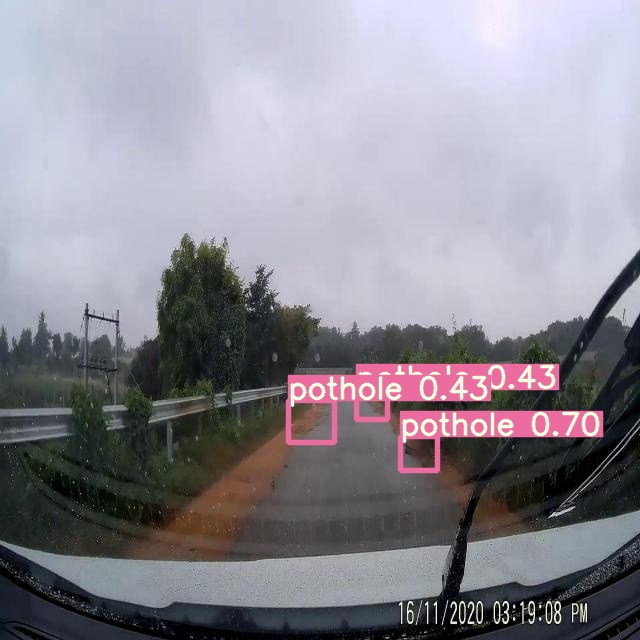

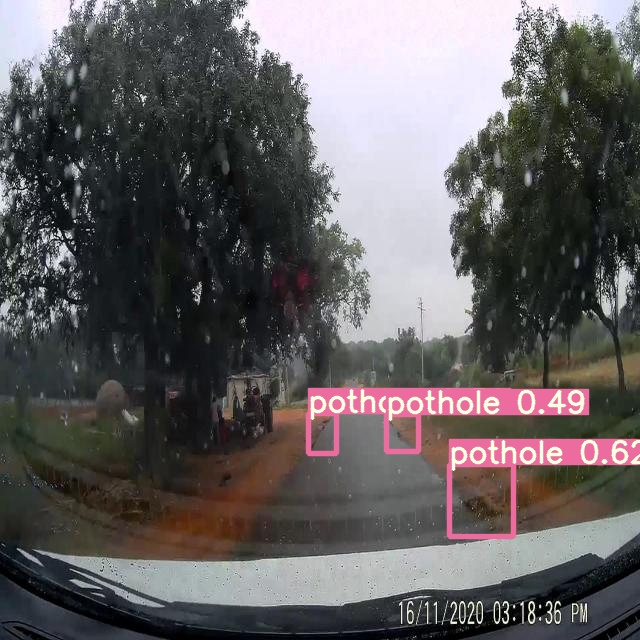

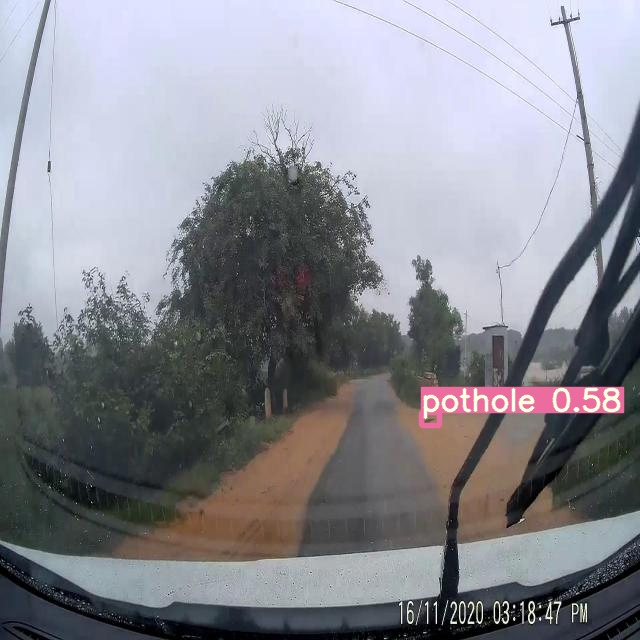

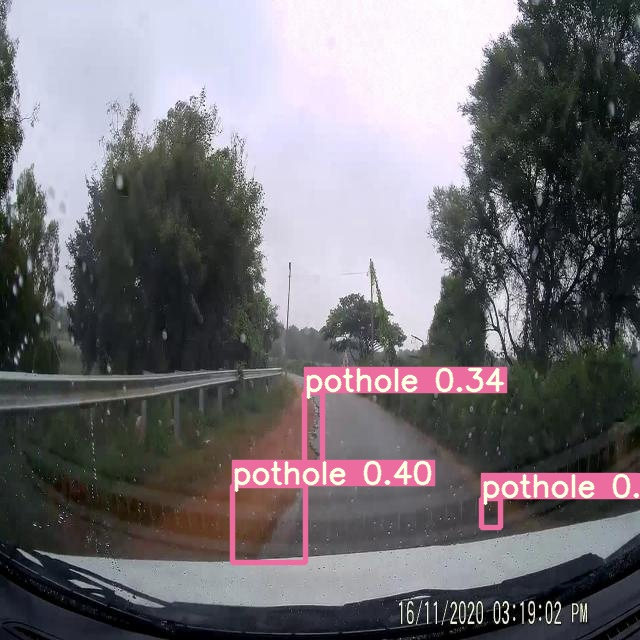

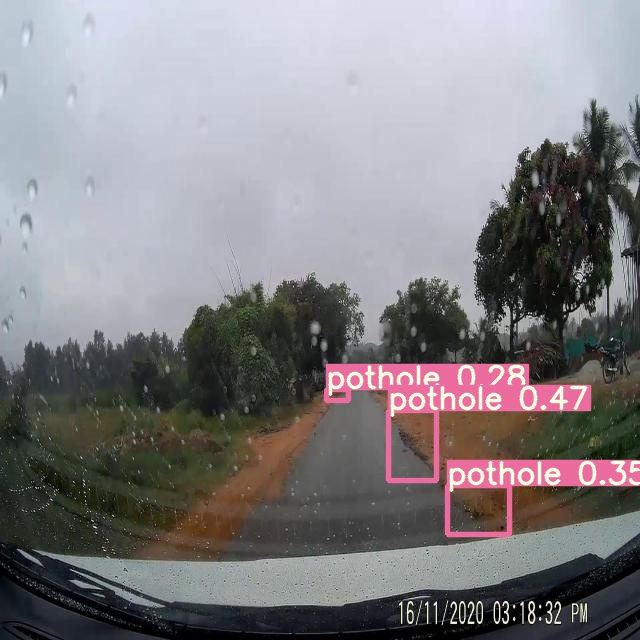

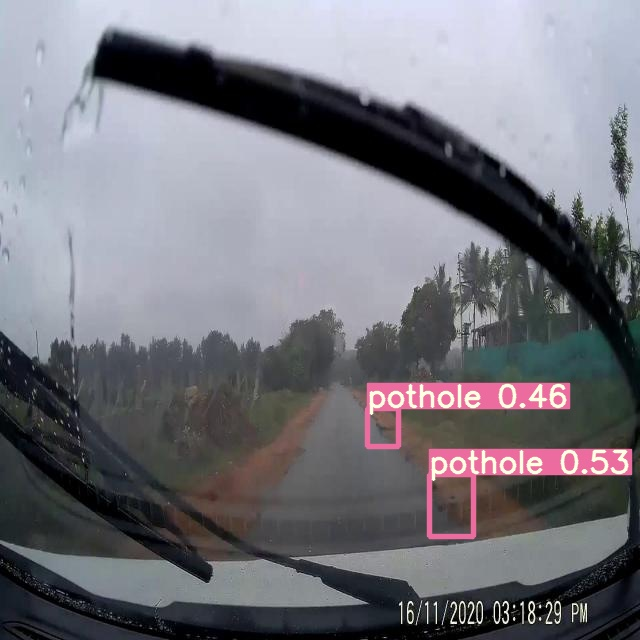

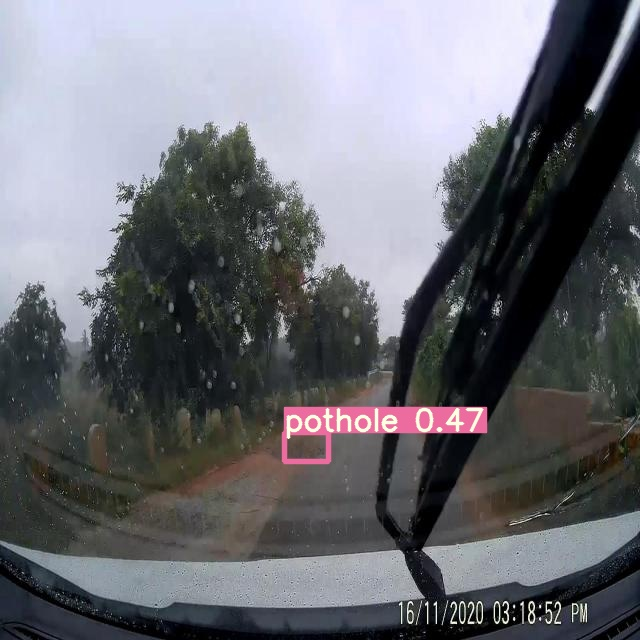

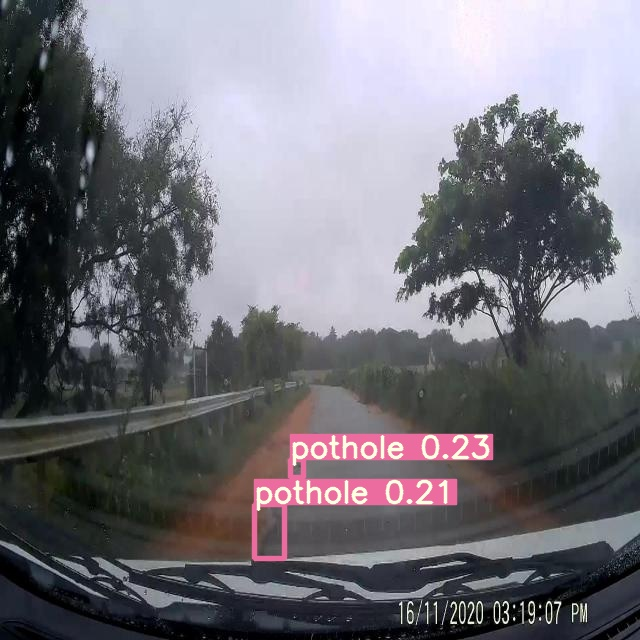

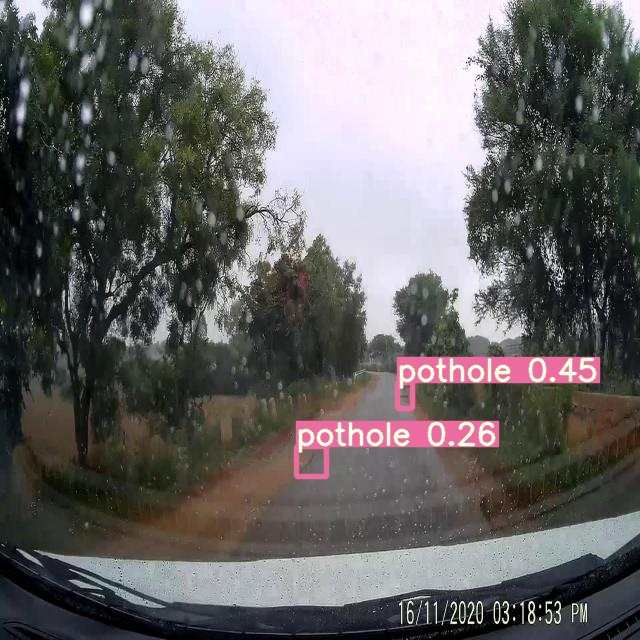

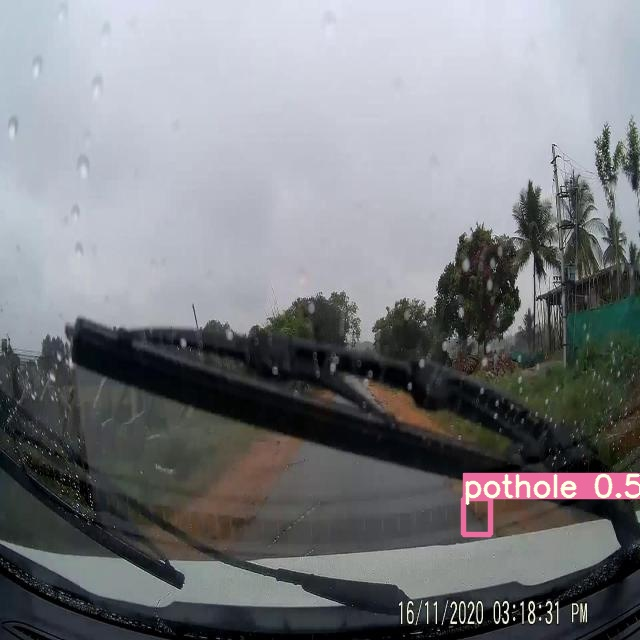

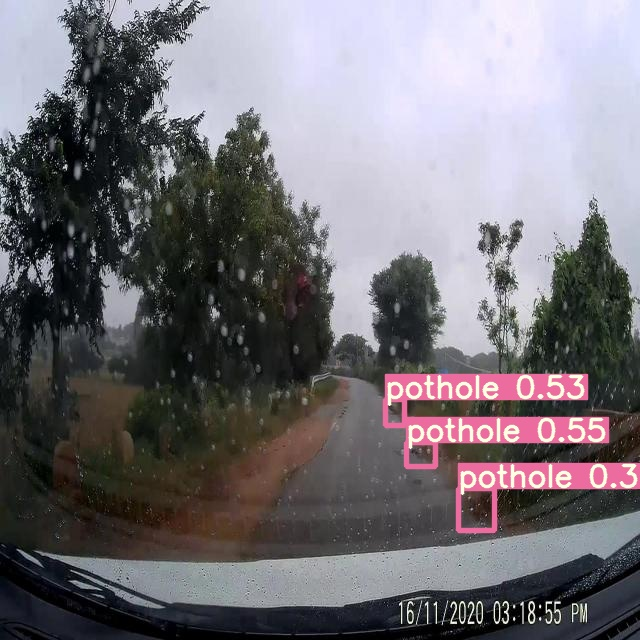

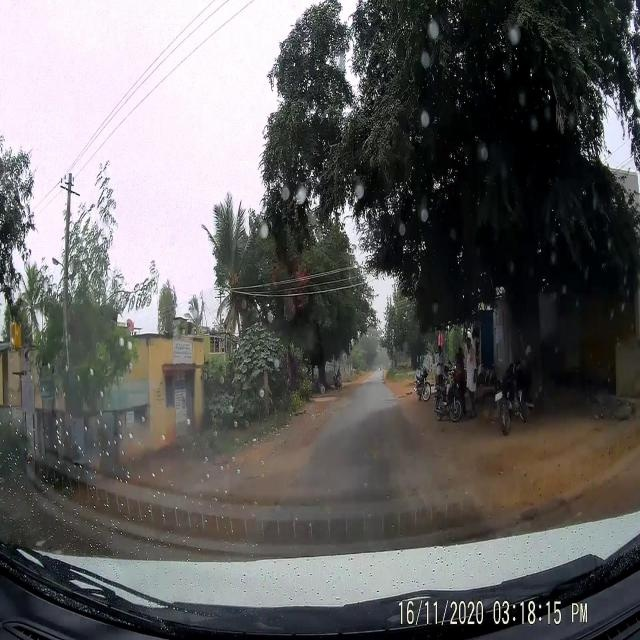

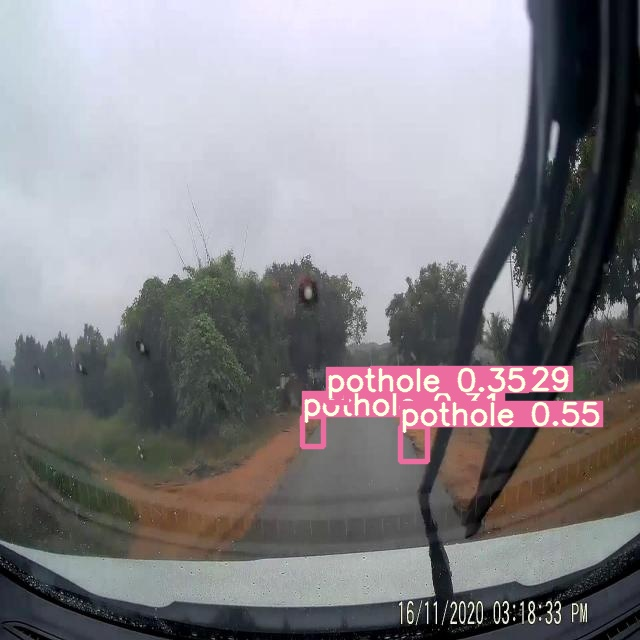

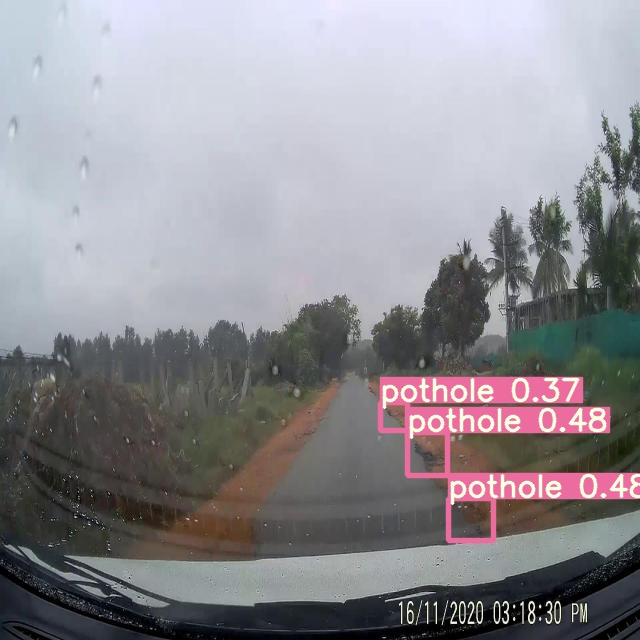

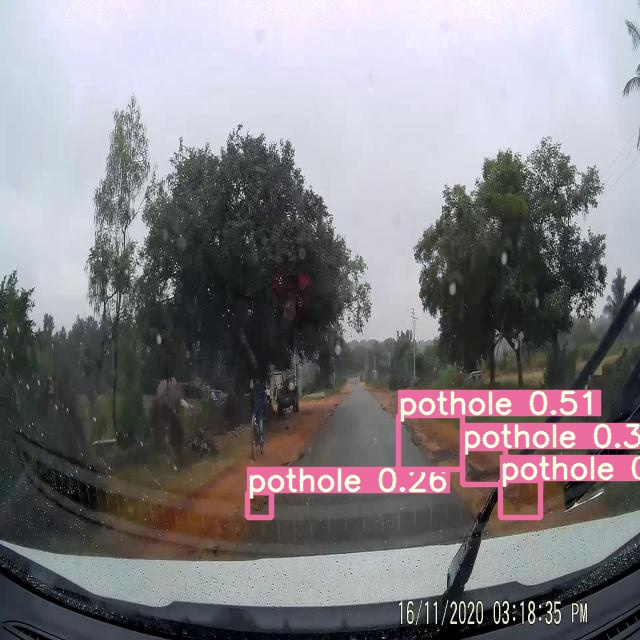

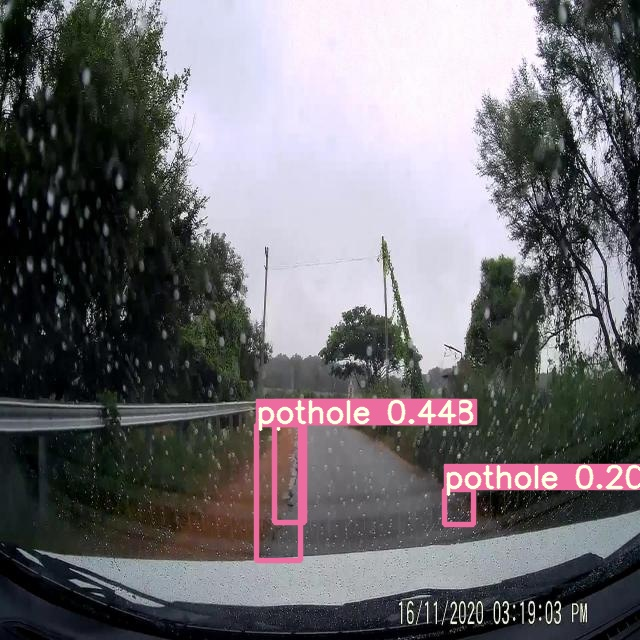

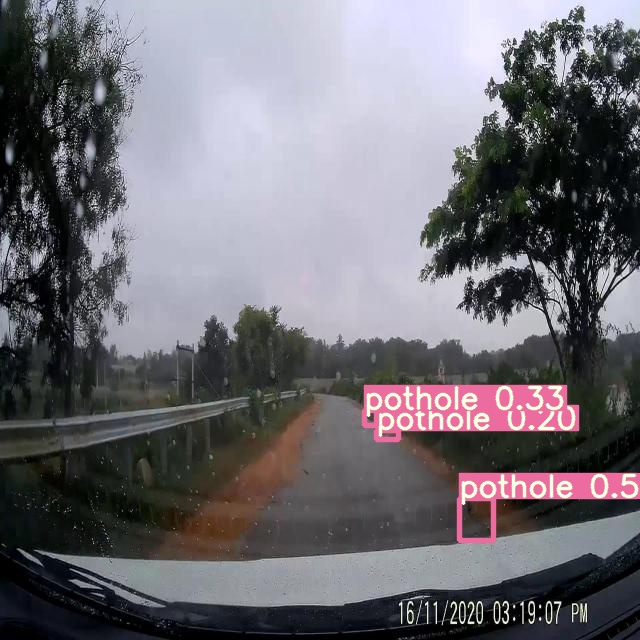

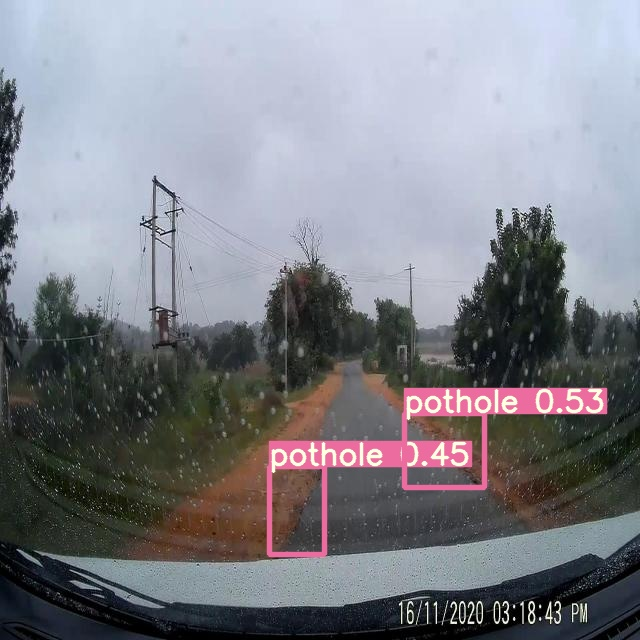

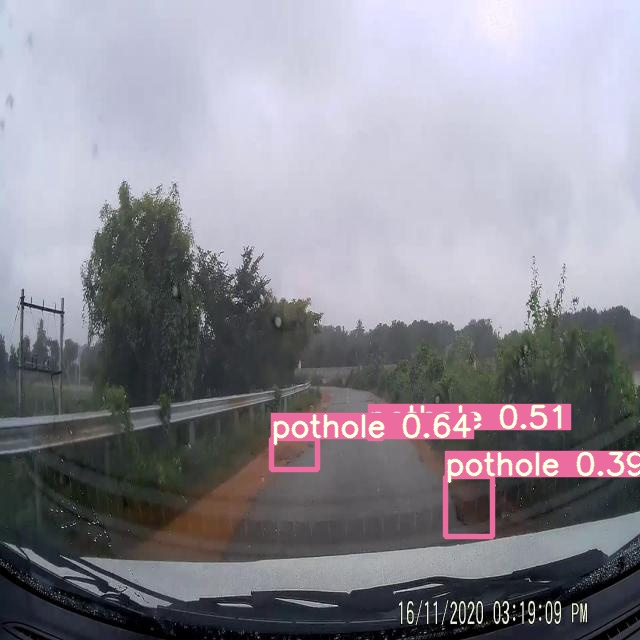

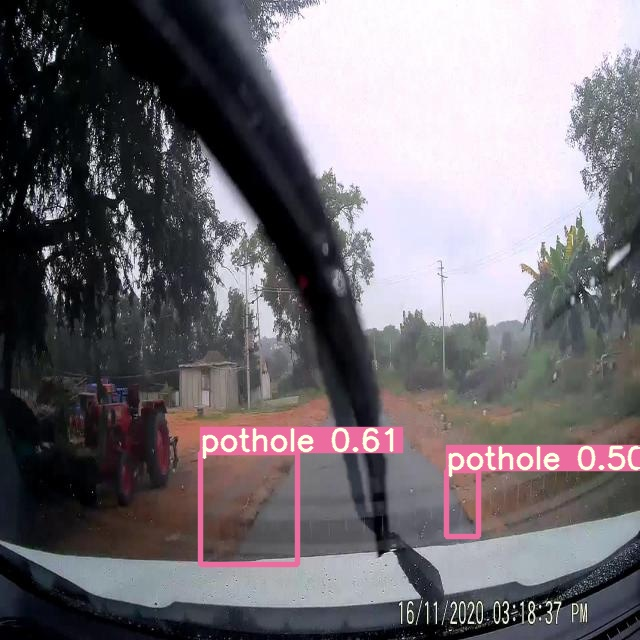

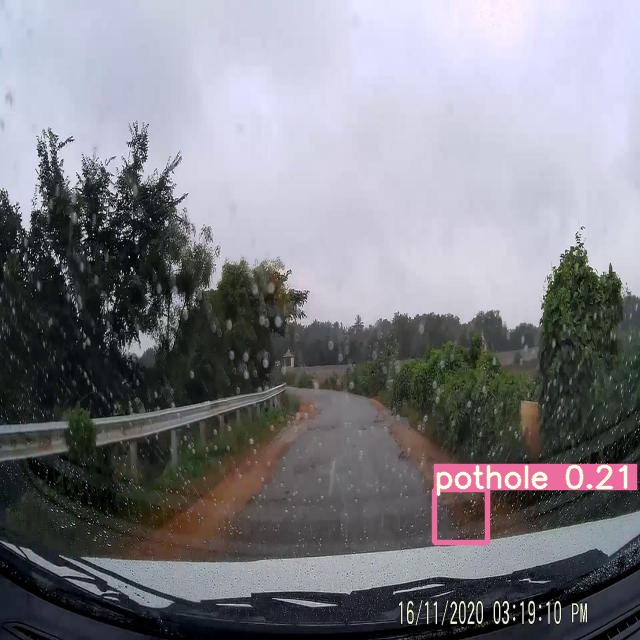

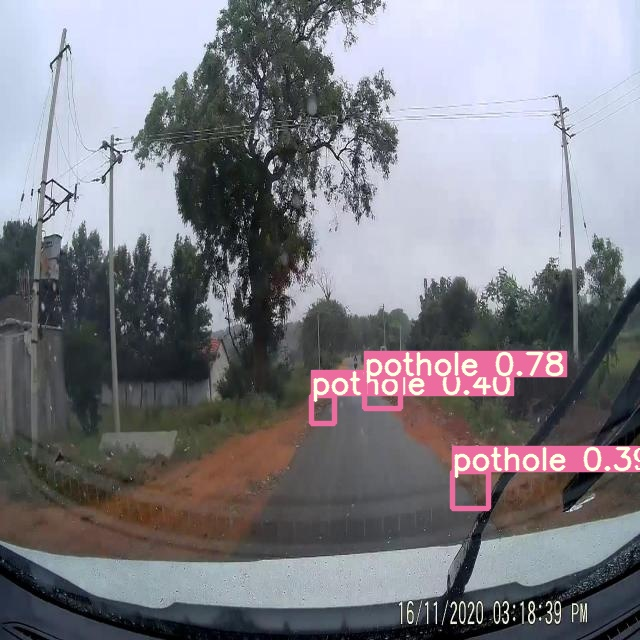

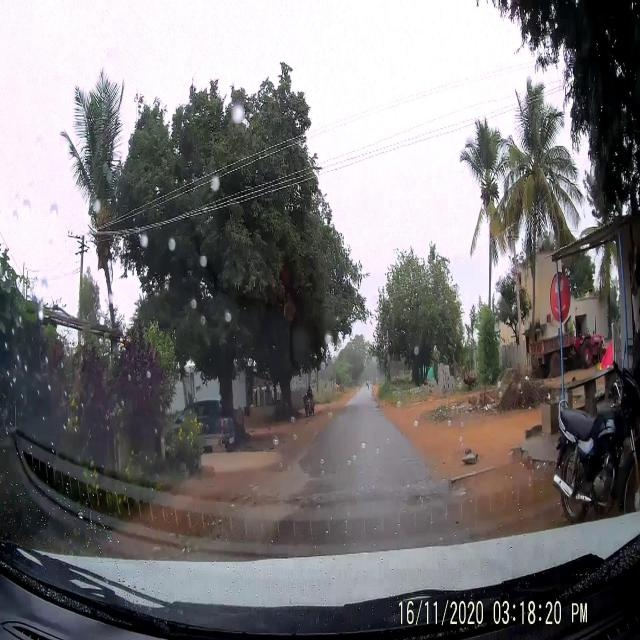

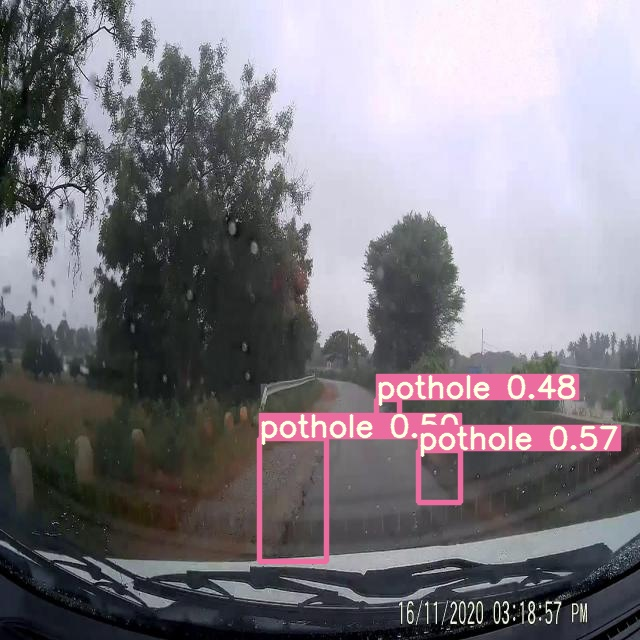

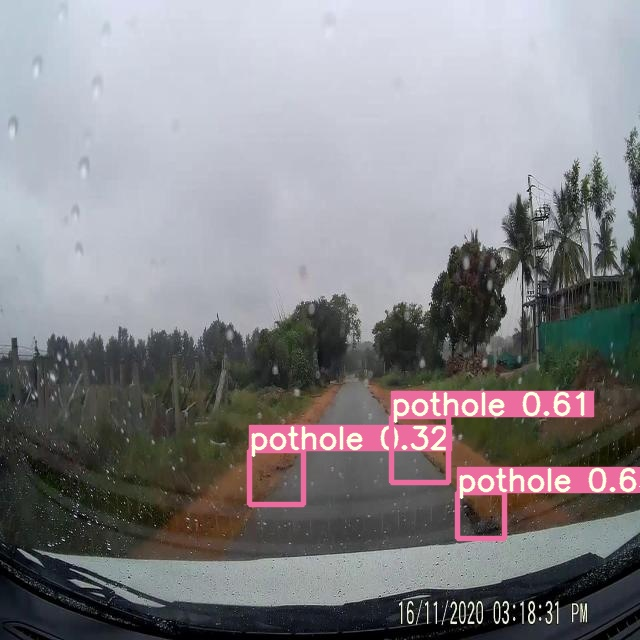

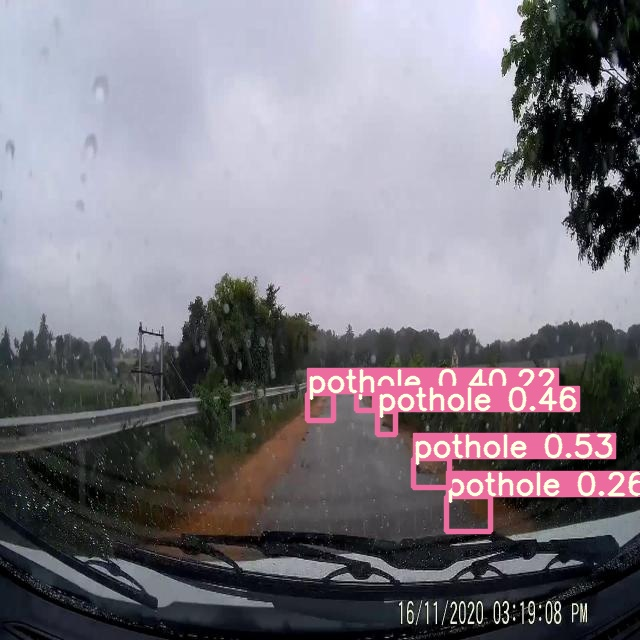

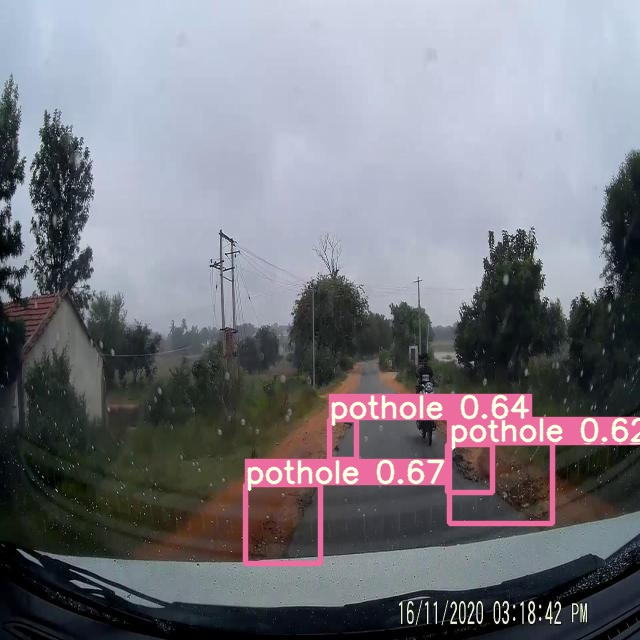

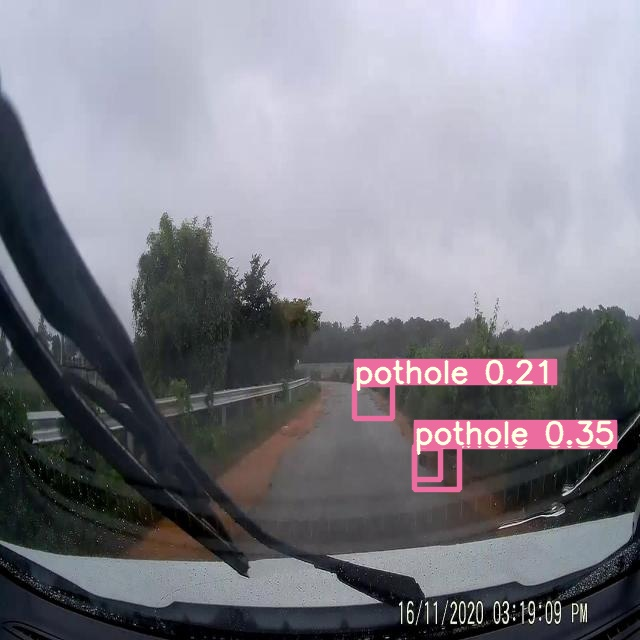

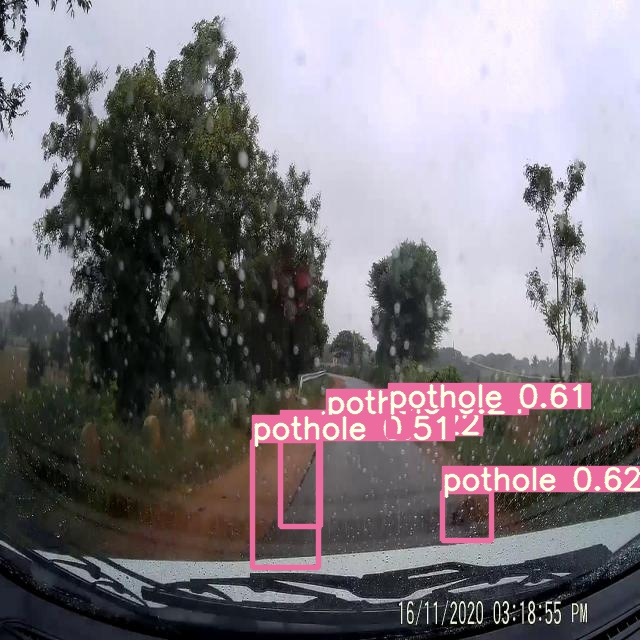

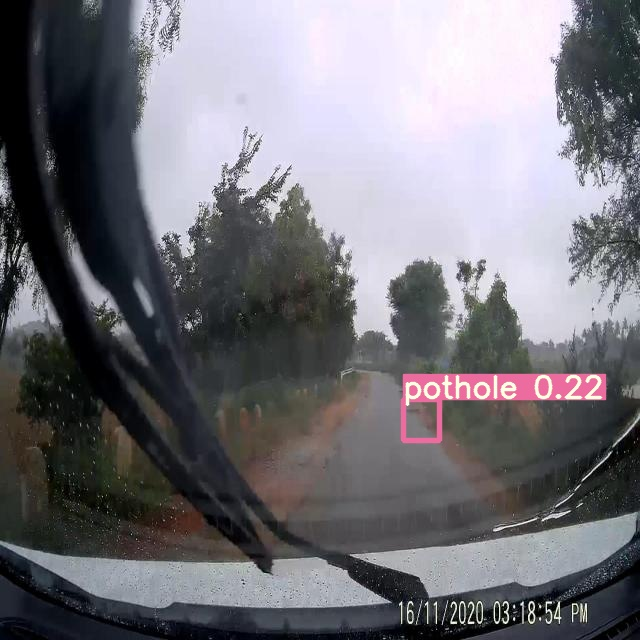

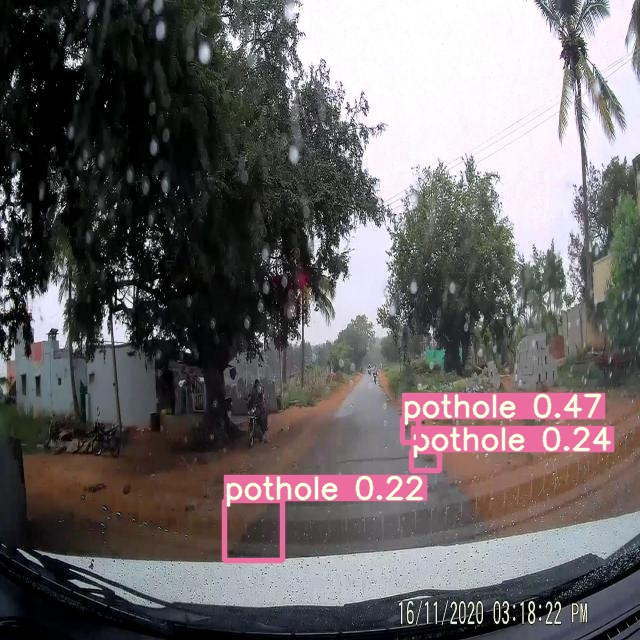

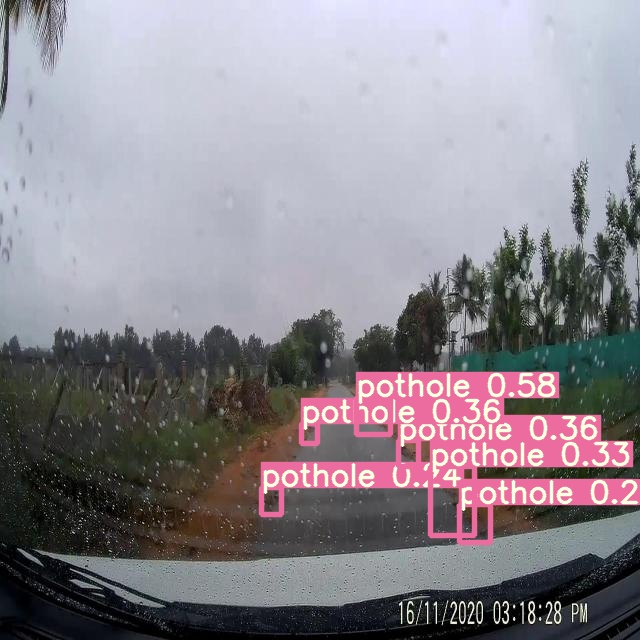

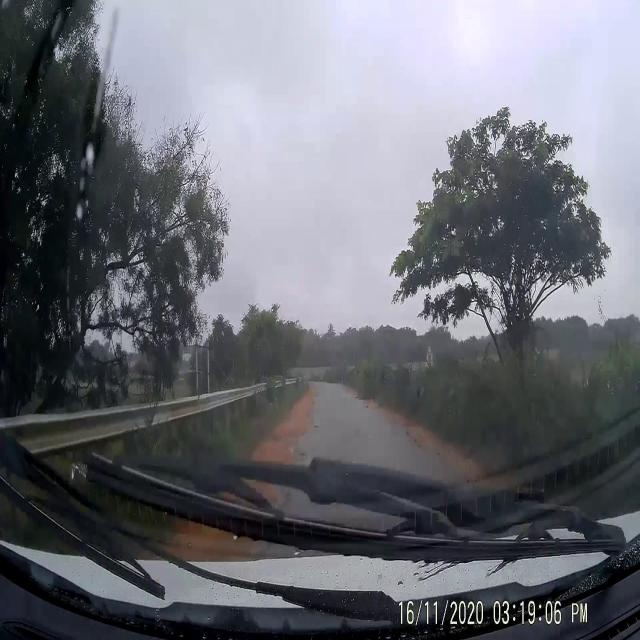

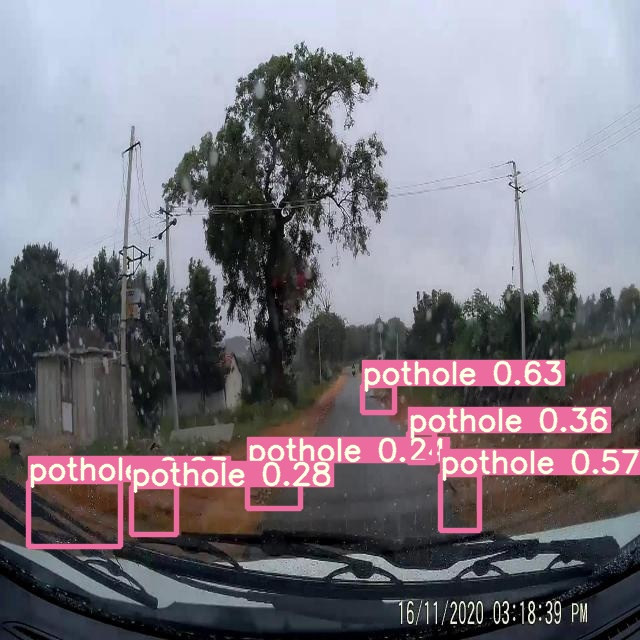

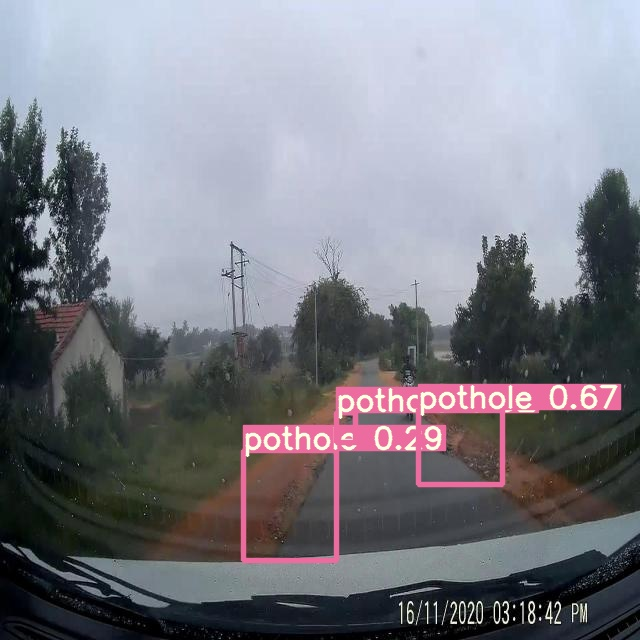

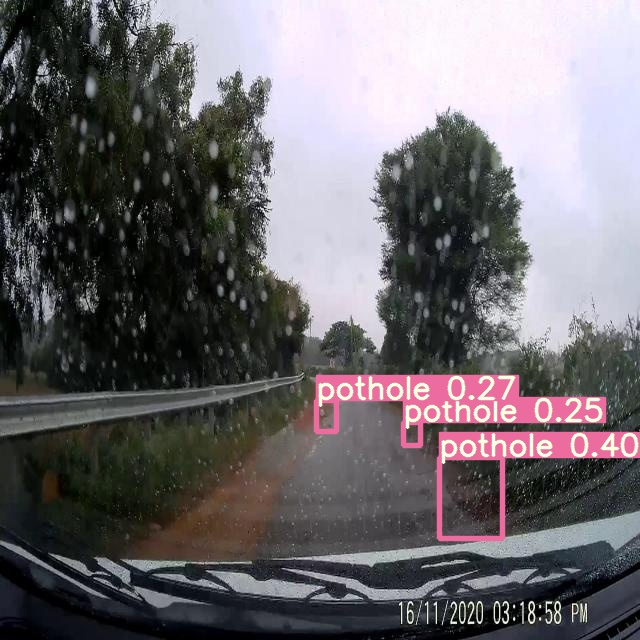

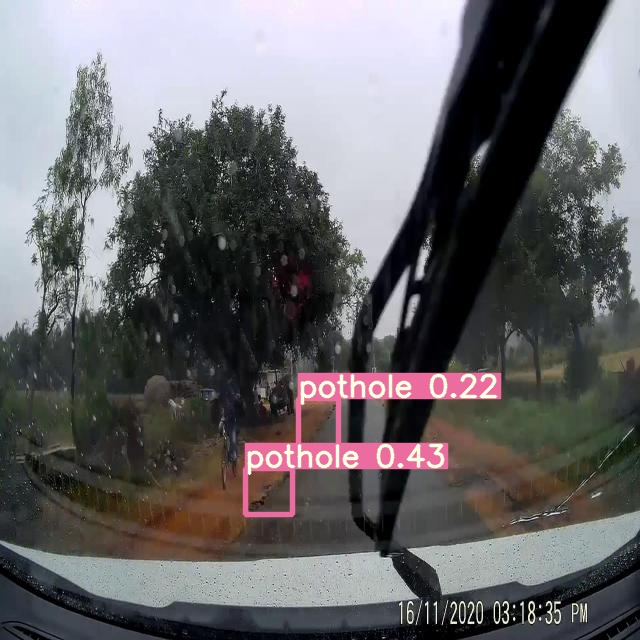

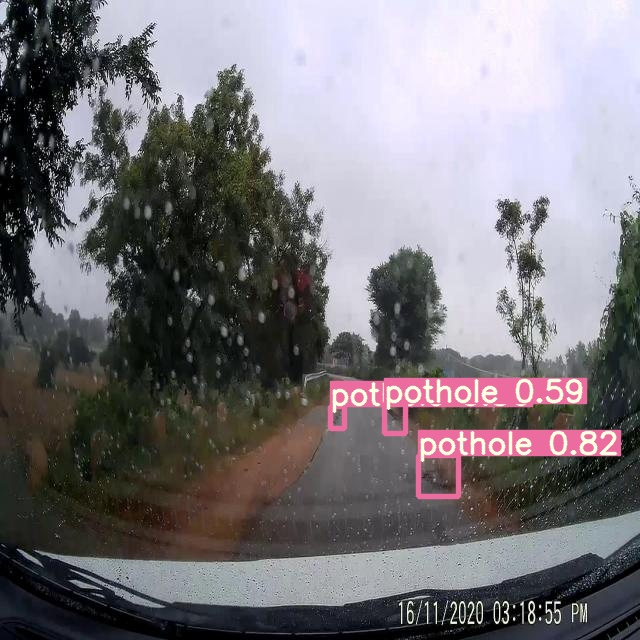

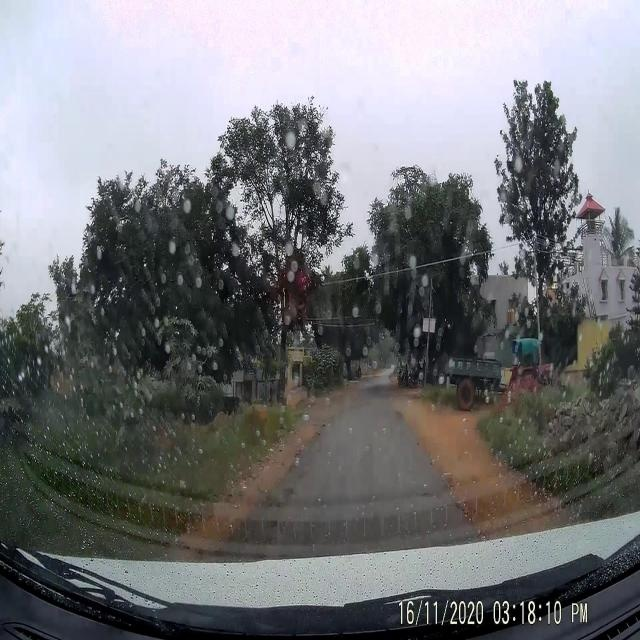

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp5/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!python detect.py --source "/content/drive/MyDrive/Untitled Project.avi" --weights /content/yolov5/runs/train/exp5/weights/best.pt --conf 0.2

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/Untitled Project.avi', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp5/weights/best.pt'])
YOLOv5 🚀 v4.0-169-g1e8ab3f torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
video 1/1 (1/3943) /content/drive/MyDrive/Untitled Project.avi: 384x640 1 pothole, Done. (0.014s)
video 1/1 (2/3943) /content/drive/MyDrive/Untitled Project.avi: 384x640 1 pothole, Done. (0.009s)
video 1/1 (3/3943) /content/drive/MyDrive/Untitled Project.avi: 384x640 2 potholes, Done. (0.009s)
video 1/1 (4/3943) /content/drive/MyDrive/Untitled Project.avi: 384x640 2 potholes, Done. (0.009s)
video 1/1 (5/3943) /content/drive/MyDrive/Untitled Project.avi: 384x640 2 pothole

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/yolov5/runs/detect/exp11/Untitled Project.avi','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

saving to drive

In [ ]:
!cp -r /content/yolov5/runs/detect.zip /content/drive/MyDrive
!cp -r /content/yolov5/runs/train.zip /content/drive/MyDrive